In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from LoR_Methods import Subtrial, LoR_Analysis, file_process
from Statistical_Methods import Statistic

RoL_stimulus_paths = file_process.extract_original_folder("/Users/haotianli/Code/EngertLab/Data/stimulus_meanRoL_v3")
print("RoL_stimulus_paths Shape:", np.array(RoL_stimulus_paths).shape)
# print(RoL_stimulus_paths[0][0])

fish_number = 0
subtrial_number = 0
subtrial_list_index0 = []
subtrial_list_index1 = []
subtrial_list_index2 = []

RoL_stimulus_paths Shape: (8, 6)


In [22]:
for fish_individual in RoL_stimulus_paths:
    
    subtrial_object_index0 = []
    subtrial_object_index1 = []
    subtrial_object_index2 = []
    for subtrial in fish_individual:
        subtrial_matrix = np.load(subtrial)
        stimulus_index = LoR_Analysis.check_index(subtrial_matrix['stimulus_data'][:, 2], 1000)
        subtrial_object = Subtrial(subtrial_matrix, fish_number, subtrial_number, stimulus_index)
        
        if stimulus_index == 0:
            subtrial_object_index0.append(subtrial_object)
        elif stimulus_index == 1:
            subtrial_object_index1.append(subtrial_object)
        elif stimulus_index == 2:
            subtrial_object_index2.append(subtrial_object)
        else:
            raise ValueError("Invalid stimulus index.")
        
        subtrial_object.preference_analysis()
        subtrial_number += 1
    
    fish_number += 1
    subtrial_number = 0
    subtrial_list_index0.append(subtrial_object_index0)
    subtrial_list_index1.append(subtrial_object_index1)
    subtrial_list_index2.append(subtrial_object_index2)
    
    
print(subtrial_list_index0)
print(subtrial_list_index1)
print(subtrial_list_index2)

subtrial_list_index1[0][0].preference_analysis()
print(subtrial_list_index1[0][0].CL_preference)

Total bout number of fish 0, trial 0: 73 (stimulus_index = 2.0)
Total bout number of fish 0, trial 1: 23 (stimulus_index = 0.0)
Total bout number of fish 0, trial 2: 14 (stimulus_index = 1.0)
Total bout number of fish 0, trial 3: 65 (stimulus_index = 2.0)


KeyboardInterrupt: 

2 1 0.0


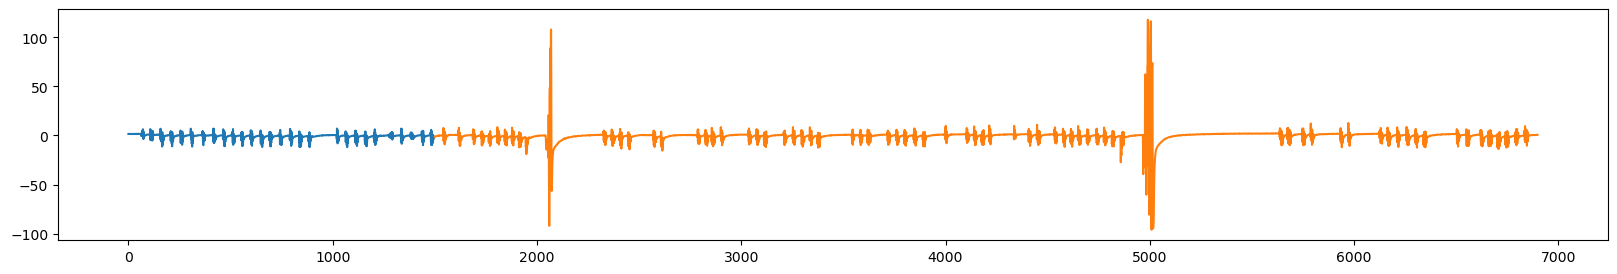

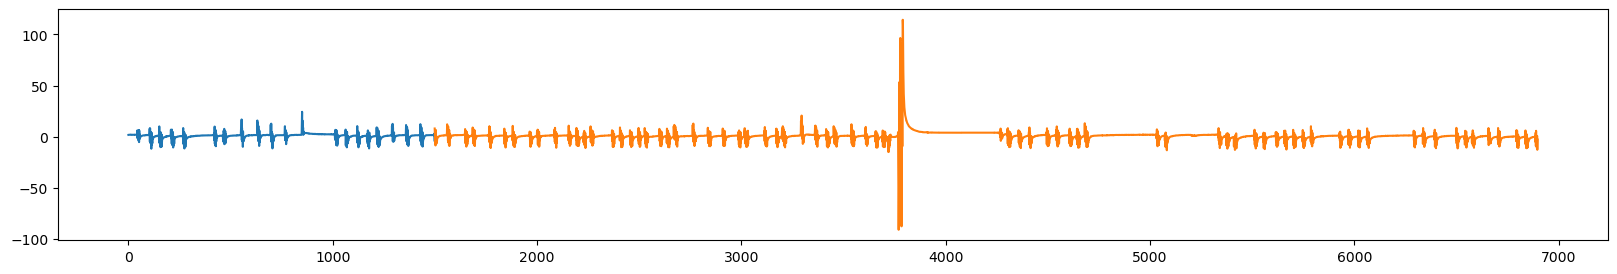

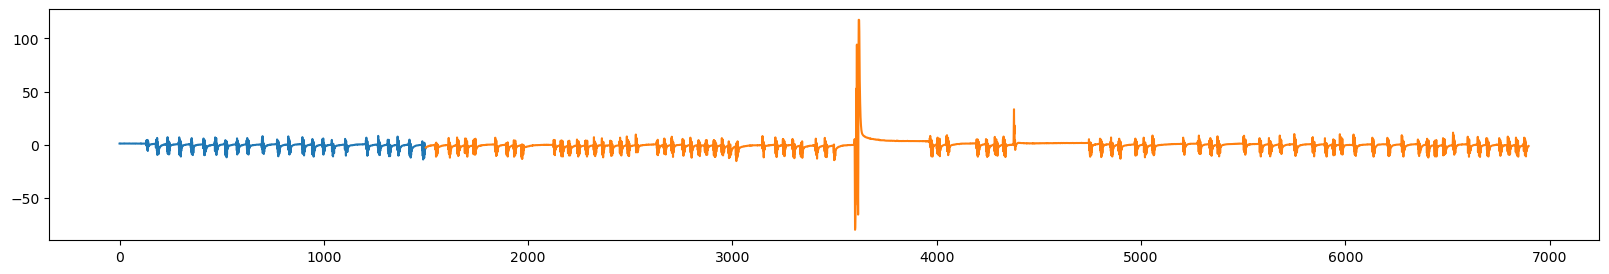

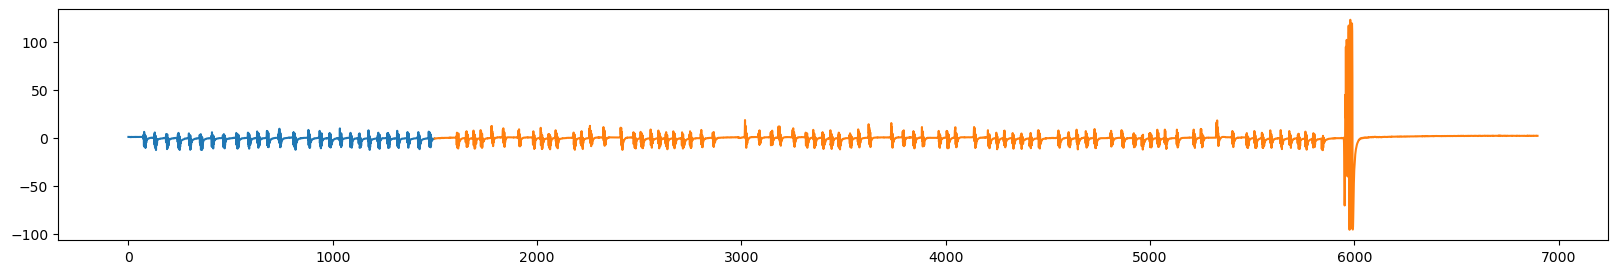

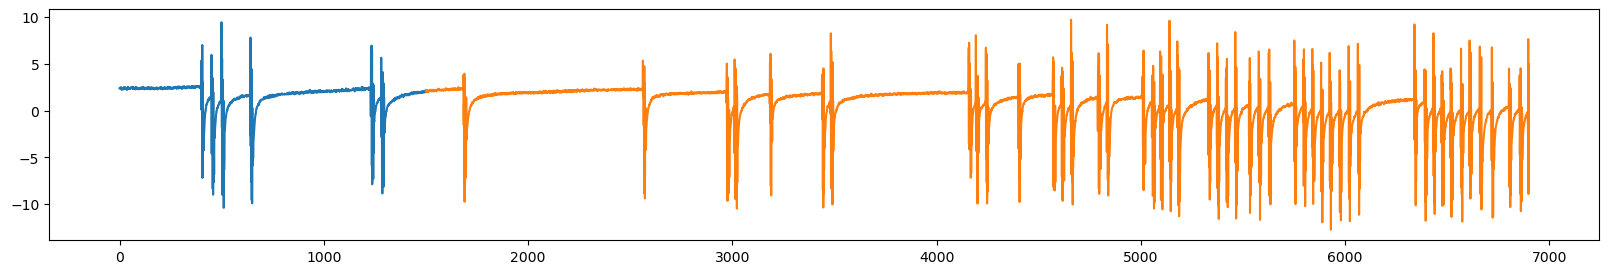

In [20]:
print(subtrial_list_index0[2][0].fish_number, subtrial_list_index0[2][0].trial_number, subtrial_list_index0[2][0].stimulus_index)

# plt.figure(figsize=(50,3))
# plt.plot(subtrial_list_index0[2][0].subtrial_matrix['stimulus_data'][:, 10])
# plt.show()

for i in range(5):
    plt.figure(figsize=(20,3))
    data1 = subtrial_list_index0[2][0].subtrial_matrix['stimulus_data'][:, 10][subtrial_list_index0[2][0].CL_start_series[i]:subtrial_list_index0[2][0].CL_end_series[i]]
    data2 = subtrial_list_index0[2][0].subtrial_matrix['stimulus_data'][:, 10][subtrial_list_index0[2][0].Condition_start_series[i]:subtrial_list_index0[2][0].Condition_end_series[i]]
    x1 = np.arange(0, len(data1))
    x2 = np.arange(len(data1), len(data1) + len(data2))
    plt.plot(x1, data1)
    plt.plot(x2, data2)
    plt.show()
    
